# Statistics with AI 2 Final Project
## Mobile Device Price Predictions

### EDA

In [3]:
import pandas as pd

#load the dataset
df = pd.read_csv('Mobiles Dataset (2025).csv', encoding='ISO-8859-1')
df

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 66,220","INR 23,999","CNY 2,099",USD 280,"AED 1,029",2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 71,220","INR 25,999","CNY 2,299",USD 300,"AED 1,099",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 604,999","INR 164,999","¥13,999","USD 1,899","AED 7,199",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 544,999","INR 176,999","CNY 15,999",USD 1719,"AED 7,699",2024


This is to see all the unique values in each column. Seeing the unique values shows us the commonalities between the values and which data is meaningful to extract.

In [6]:
for column in df.columns:
    uniqueValues = df[column].unique()
    print(f"Column: {column}")
    print(uniqueValues)
    print("-" * 40)

Column: Company Name
['Apple' 'Samsung' 'OnePlus' 'Vivo' 'iQOO' 'Oppo' 'Realme' 'Xiaomi'
 'Lenovo' 'Motorola' 'Huawei' 'Nokia' 'Sony' 'Google' 'Tecno' 'Infinix'
 'Honor' 'POCO' 'Poco']
----------------------------------------
Column: Model Name
['iPhone 16 128GB' 'iPhone 16 256GB' 'iPhone 16 512GB'
 'iPhone 16 Plus 128GB' 'iPhone 16 Plus 256GB' 'iPhone 16 Plus 512GB'
 'iPhone 16 Pro 128GB' 'iPhone 16 Pro 256GB' 'iPhone 16 Pro 512GB'
 'iPhone 16 Pro Max 128GB' 'iPhone 16 Pro Max 256GB'
 'iPhone 16 Pro Max 512GB' 'iPhone 15 128GB' 'iPhone 15 256GB'
 'iPhone 15 512GB' 'iPhone 15 Plus 128GB' 'iPhone 15 Plus 256GB'
 'iPhone 15 Plus 512GB' 'iPhone 15 Pro 128GB' 'iPhone 15 Pro 256GB'
 'iPhone 15 Pro 512GB' 'iPhone 15 Pro Max 128GB' 'iPhone 15 Pro Max 256GB'
 'iPhone 15 Pro Max 512GB' 'iPhone 14 128GB' 'iPhone 14 256GB'
 'iPhone 14 512GB' 'iPhone 14 Plus 128GB' 'iPhone 14 Plus 256GB'
 'iPhone 14 Plus 512GB' 'iPhone 14 Pro 128GB' 'iPhone 14 Pro 256GB'
 'iPhone 14 Pro 512GB' 'iPhone 14 Pro Max 1

Data isn't numerical yet. All columns have text with the numerical values making the colunns string values instead of numerical. I have to trim all the data to only contain the numbers and rename the columns so I know the units for each column. We also only want the USD price because that will make the most sense for us and our audience. It will also avoid any collinearity issues we may face.

In [9]:
#helper to extract numeric values
def extract_numeric(series, pattern=r'[\d,.]+'):
    return series.str.extract(f'({pattern})')[0].str.replace(',', '', regex=False).astype(float)

#replace columns with numeric values
df['RAM'] = extract_numeric(df['RAM'])
df['Front Camera'] = extract_numeric(df['Front Camera'])
df['Back Camera'] = extract_numeric(df['Back Camera'])
df['Mobile Weight'] = extract_numeric(df['Mobile Weight'])
df['Battery Capacity'] = extract_numeric(df['Battery Capacity'])
df['Screen Size'] = extract_numeric(df['Screen Size'])

#price columns
price_cols = [
    'Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)',
    'Launched Price (USA)', 'Launched Price (Dubai)'
]

#replace price columns with numeric values
for col in price_cols:
    df[col] = extract_numeric(df[col])

#rename columns for clarity (e.g., add units)
df.rename(columns={
    'RAM': 'RAM (GB)',
    'Front Camera': 'Front Camera (MP)',
    'Back Camera': 'Back Camera (MP)',
    'Mobile Weight': 'Weight (g)',
    'Battery Capacity': 'Battery (mAh)',
    'Screen Size': 'Screen Size (in)',
    'Launched Price (Pakistan)': 'Price PKR',
    'Launched Price (India)': 'Price INR',
    'Launched Price (China)': 'Price CNY',
    'Launched Price (USA)': 'Price USD',
    'Launched Price (Dubai)': 'Price AED'
}, inplace=True)

#removing the other price columsn so we only have USD
cols_to_drop = ['Price PKR', 'Price INR', 'Price CNY', 'Price AED']
df.drop(columns=cols_to_drop, inplace=True)

#cleaner df
df

,Company Name,Model Name,Weight (g),RAM (GB),Front Camera (MP),Back Camera (MP),Processor,Battery (mAh),Screen Size (in),Price USD,Launched Year
0,Apple,iPhone 16 128GB,174.0,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,799.0,2024
1,Apple,iPhone 16 256GB,174.0,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,849.0,2024
2,Apple,iPhone 16 512GB,174.0,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,899.0,2024
3,Apple,iPhone 16 Plus 128GB,203.0,6.0,12.0,48.0,A17 Bionic,4200.0,6.7,899.0,2024
4,Apple,iPhone 16 Plus 256GB,203.0,6.0,12.0,48.0,A17 Bionic,4200.0,6.7,949.0,2024
...,...,...,...,...,...,...,...,...,...,...,...
925,Poco,Pad 5G 128GB,571.0,8.0,8.0,8.0,Snapdragon 7s Gen 2,10000.0,12.1,280.0,2024
926,Poco,Pad 5G 256GB,571.0,8.0,8.0,8.0,Snapdragon 7s Gen 2,10000.0,12.1,300.0,2024
927,Samsung,Galaxy Z Fold6 256GB,239.0,12.0,10.0,50.0,Snapdragon 8 Gen 3,4400.0,7.6,1899.0,2024
928,Samsung,Galaxy Z Fold6 512GB,239.0,12.0,10.0,50.0,Snapdragon 8 Gen 3,4400.0,7.6,1719.0,2024


Want to make company name numerical. If possible we will make it a categorical variable and encode it to discrete data(0,1,2,3, ...). We will check to see how many unique companies there are in this dataset. If there are a reasonable number of entries, we will encode with discrete data.

In [12]:
unique_brand = df['Company Name'].unique()
unique_brand

array(['Apple', 'Samsung', 'OnePlus', 'Vivo', 'iQOO', 'Oppo', 'Realme',
       'Xiaomi', 'Lenovo', 'Motorola', 'Huawei', 'Nokia', 'Sony',
       'Google', 'Tecno', 'Infinix', 'Honor', 'POCO', 'Poco'],
      dtype=object)

There are only 19 companies listed in our entire dataset. That is a reasonable number to encode with a map. Here we will convert the company name column into discrete numerical data. The mapping is listed below for reference. 

In [15]:
#convert company names to integer codes
df['Company Name'], company_labels = pd.factorize(df['Company Name'])

#rename column
df.rename(columns={'Company Name': 'Company'}, inplace=True)

#show mapping of codes to original names
company_mapping = dict(enumerate(company_labels))
print("Company Code Mapping:")
for code, name in company_mapping.items():
    print(f"{code}: {name}")

Company Code Mapping:
0: Apple
1: Samsung
2: OnePlus
3: Vivo
4: iQOO
5: Oppo
6: Realme
7: Xiaomi
8: Lenovo
9: Motorola
10: Huawei
11: Nokia
12: Sony
13: Google
14: Tecno
15: Infinix
16: Honor
17: POCO
18: Poco


In [17]:
df

,Company,Model Name,Weight (g),RAM (GB),Front Camera (MP),Back Camera (MP),Processor,Battery (mAh),Screen Size (in),Price USD,Launched Year
0,0,iPhone 16 128GB,174.0,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,799.0,2024
1,0,iPhone 16 256GB,174.0,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,849.0,2024
2,0,iPhone 16 512GB,174.0,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,899.0,2024
3,0,iPhone 16 Plus 128GB,203.0,6.0,12.0,48.0,A17 Bionic,4200.0,6.7,899.0,2024
4,0,iPhone 16 Plus 256GB,203.0,6.0,12.0,48.0,A17 Bionic,4200.0,6.7,949.0,2024
...,...,...,...,...,...,...,...,...,...,...,...
925,18,Pad 5G 128GB,571.0,8.0,8.0,8.0,Snapdragon 7s Gen 2,10000.0,12.1,280.0,2024
926,18,Pad 5G 256GB,571.0,8.0,8.0,8.0,Snapdragon 7s Gen 2,10000.0,12.1,300.0,2024
927,1,Galaxy Z Fold6 256GB,239.0,12.0,10.0,50.0,Snapdragon 8 Gen 3,4400.0,7.6,1899.0,2024
928,1,Galaxy Z Fold6 512GB,239.0,12.0,10.0,50.0,Snapdragon 8 Gen 3,4400.0,7.6,1719.0,2024


Want to make model name numerical. If possible we will make it a categorical variable and encode it to discrete data(0,1,2,3, ...). We will check to see how many unique models there are in this dataset. If there are a reasonable number of entries, we will encode with discrete data.

In [20]:
unique_model = df['Model Name'].unique()
unique_count = df['Model Name'].nunique()
print(f"Number of unique values in 'Model Name': {unique_count}")
unique_model

Number of unique values in 'Model Name': 908


array(['iPhone 16 128GB', 'iPhone 16 256GB', 'iPhone 16 512GB',
       'iPhone 16 Plus 128GB', 'iPhone 16 Plus 256GB',
       'iPhone 16 Plus 512GB', 'iPhone 16 Pro 128GB',
       'iPhone 16 Pro 256GB', 'iPhone 16 Pro 512GB',
       'iPhone 16 Pro Max 128GB', 'iPhone 16 Pro Max 256GB',
       'iPhone 16 Pro Max 512GB', 'iPhone 15 128GB', 'iPhone 15 256GB',
       'iPhone 15 512GB', 'iPhone 15 Plus 128GB', 'iPhone 15 Plus 256GB',
       'iPhone 15 Plus 512GB', 'iPhone 15 Pro 128GB',
       'iPhone 15 Pro 256GB', 'iPhone 15 Pro 512GB',
       'iPhone 15 Pro Max 128GB', 'iPhone 15 Pro Max 256GB',
       'iPhone 15 Pro Max 512GB', 'iPhone 14 128GB', 'iPhone 14 256GB',
       'iPhone 14 512GB', 'iPhone 14 Plus 128GB', 'iPhone 14 Plus 256GB',
       'iPhone 14 Plus 512GB', 'iPhone 14 Pro 128GB',
       'iPhone 14 Pro 256GB', 'iPhone 14 Pro 512GB',
       'iPhone 14 Pro Max 128GB', 'iPhone 14 Pro Max 256GB',
       'iPhone 14 Pro Max 512GB', 'iPhone 13 mini 128GB',
       'iPhone 13 mini 256G

There are over 900 difference model types, so encoding all of these would be very difficult and pointless. We saw that this column has the storage amount for the device in it. We wanted to see if we can make that into an extra column. Below we are attempting to extract the storage and converting it to GB.

In [23]:
import pandas as pd
import re

#helping extract storage number and convert to GB
def extractStorageNumber(text):
    if pd.isnull(text):
        return None
    match = re.search(r'(\d+)\s*(GB|MB|TB)', text.upper())
    if match:
        number = int(match.group(1))
        unit = match.group(2)
        if unit == 'TB':
            number *= 1024  #convert TB to GB
        elif unit == 'MB':
            number = number / 1024  #convert MB to GB
        return number
    else:
        return None

#use the function
df['Storage (GB)'] = df['Model Name'].apply(extractStorageNumber)

#show the result
print(df[['Model Name', 'Storage (GB)']])

               Model Name  Storage (GB)
0         iPhone 16 128GB         128.0
1         iPhone 16 256GB         256.0
2         iPhone 16 512GB         512.0
3    iPhone 16 Plus 128GB         128.0
4    iPhone 16 Plus 256GB         256.0
..                    ...           ...
925          Pad 5G 128GB         128.0
926          Pad 5G 256GB         256.0
927  Galaxy Z Fold6 256GB         256.0
928  Galaxy Z Fold6 512GB         512.0
929    Galaxy Z Fold6 1TB        1024.0

[930 rows x 2 columns]


We were able to extract the storage information from the column and make a new column out of it. We will end up removing the model name column.

Want to make Processor numerical. If possible we will make it a categorical variable and encode it to discrete data(0,1,2,3, ...). We will check to see how many unique processors there are in this dataset. If there are a reasonable number of entries, we will encode with discrete data.

In [27]:
unique_processors = df['Processor'].unique()
unique_count = df['Processor'].nunique()
print(f"Number of unique values in 'Processor': {unique_count}")
unique_processors

Number of unique values in 'Processor': 217


array(['A17 Bionic', 'A17 Pro', 'A16 Bionic', 'A15 Bionic', 'A14 Bionic',
       'A13 Bionic', 'A11 Bionic', 'A12 Bionic', 'A12Z Bionic',
       'Exynos 2400', 'Snapdragon 8 Gen 2', 'Exynos 2200',
       'Snapdragon 8 Gen 1', 'Exynos 1380', 'MediaTek Dimensity 1080',
       'MediaTek Helio G99', 'Exynos 850', 'Exynos 1280',
       'MediaTek Helio P35', 'Exynos 990', 'Exynos 9825',
       'Snapdragon 450', 'Exynos 7870', 'Snapdragon 425', 'Exynos 7570',
       'Snapdragon 653', 'Snapdragon 625', 'Snapdragon 617',
       'Snapdragon 888', 'Snapdragon 695', 'Unisoc T618',
       'MediaTek Helio P22T', 'Snapdragon 778G', 'Exynos 9810',
       'Spreadtrum SC8830', 'Qualcomm MSM8916', 'Snapdragon 8 Gen 3',
       'MediaTek Dimensity 9000', 'Snapdragon 782G',
       'MediaTek Dimensity 6020', 'Snapdragon 8+ Gen 1',
       'MediaTek Dimensity 1300', 'MediaTek Dimensity 1200-AI',
       'Snapdragon 480', 'Qualcomm Snapdragon 460', 'Snapdragon 865',
       'Snapdragon 870', 'MediaTek Dimensity 9

There are over 200 entries to encode. Encoding all of these would be difficult and not super useful. There doesn't appear to be many correlations between the entries, so this column isn't very useful. Due to this we will end up removing it.

In [30]:
cols_to_drop = ['Processor', 'Model Name']
df.drop(columns=cols_to_drop, inplace=True)
df

,Company,Weight (g),RAM (GB),Front Camera (MP),Back Camera (MP),Battery (mAh),Screen Size (in),Price USD,Launched Year,Storage (GB)
0,0,174.0,6.0,12.0,48.0,3600.0,6.1,799.0,2024,128.0
1,0,174.0,6.0,12.0,48.0,3600.0,6.1,849.0,2024,256.0
2,0,174.0,6.0,12.0,48.0,3600.0,6.1,899.0,2024,512.0
3,0,203.0,6.0,12.0,48.0,4200.0,6.7,899.0,2024,128.0
4,0,203.0,6.0,12.0,48.0,4200.0,6.7,949.0,2024,256.0
...,...,...,...,...,...,...,...,...,...,...
925,18,571.0,8.0,8.0,8.0,10000.0,12.1,280.0,2024,128.0
926,18,571.0,8.0,8.0,8.0,10000.0,12.1,300.0,2024,256.0
927,1,239.0,12.0,10.0,50.0,4400.0,7.6,1899.0,2024,256.0
928,1,239.0,12.0,10.0,50.0,4400.0,7.6,1719.0,2024,512.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            930 non-null    int64  
 1   Weight (g)         930 non-null    float64
 2   RAM (GB)           930 non-null    float64
 3   Front Camera (MP)  930 non-null    float64
 4   Back Camera (MP)   930 non-null    float64
 5   Battery (mAh)      930 non-null    float64
 6   Screen Size (in)   930 non-null    float64
 7   Price USD          930 non-null    float64
 8   Launched Year      930 non-null    int64  
 9   Storage (GB)       778 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 72.8 KB


All of our data looks good. All of our remaining columns are of numerical data types, and the entries look valid with no null values. Our dataset is finally ready to be used for statistical analysis and processing.

In [35]:
df.to_csv('cleaned_mobile_data.csv', index=False)

**Statistical Analysis**

Seeing trend of device prices over the years to gain insight and form questions to solve. We can see that there is a general increase in average device prices over the years. What has caused this increase in prices? Are there any variables that may correlate to this increase? Is there a correlation between any variables and salary overall? We hope to answer some of these questions in our Machine Learning models.

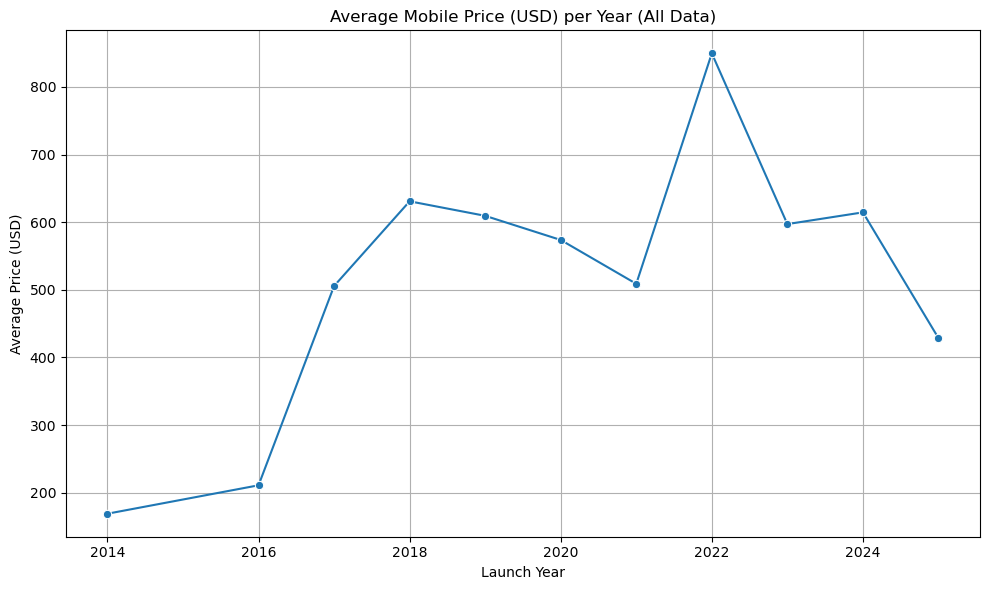

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#group by year and compute average price
avg_price_per_year = df.groupby('Launched Year')['Price USD'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_price_per_year, x='Launched Year', y='Price USD', marker='o')
plt.title('Average Mobile Price (USD) per Year (All Data)')
plt.xlabel('Launch Year')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

The pairwise plot helps to show trends and relationships between all variables. We are interested in prices relationship with the otehr variables. The scatterplots for that row doesn't really show any trends. There appears to be an outlier that may be skewing the relationships. We will confirm this with a correlation matrix.

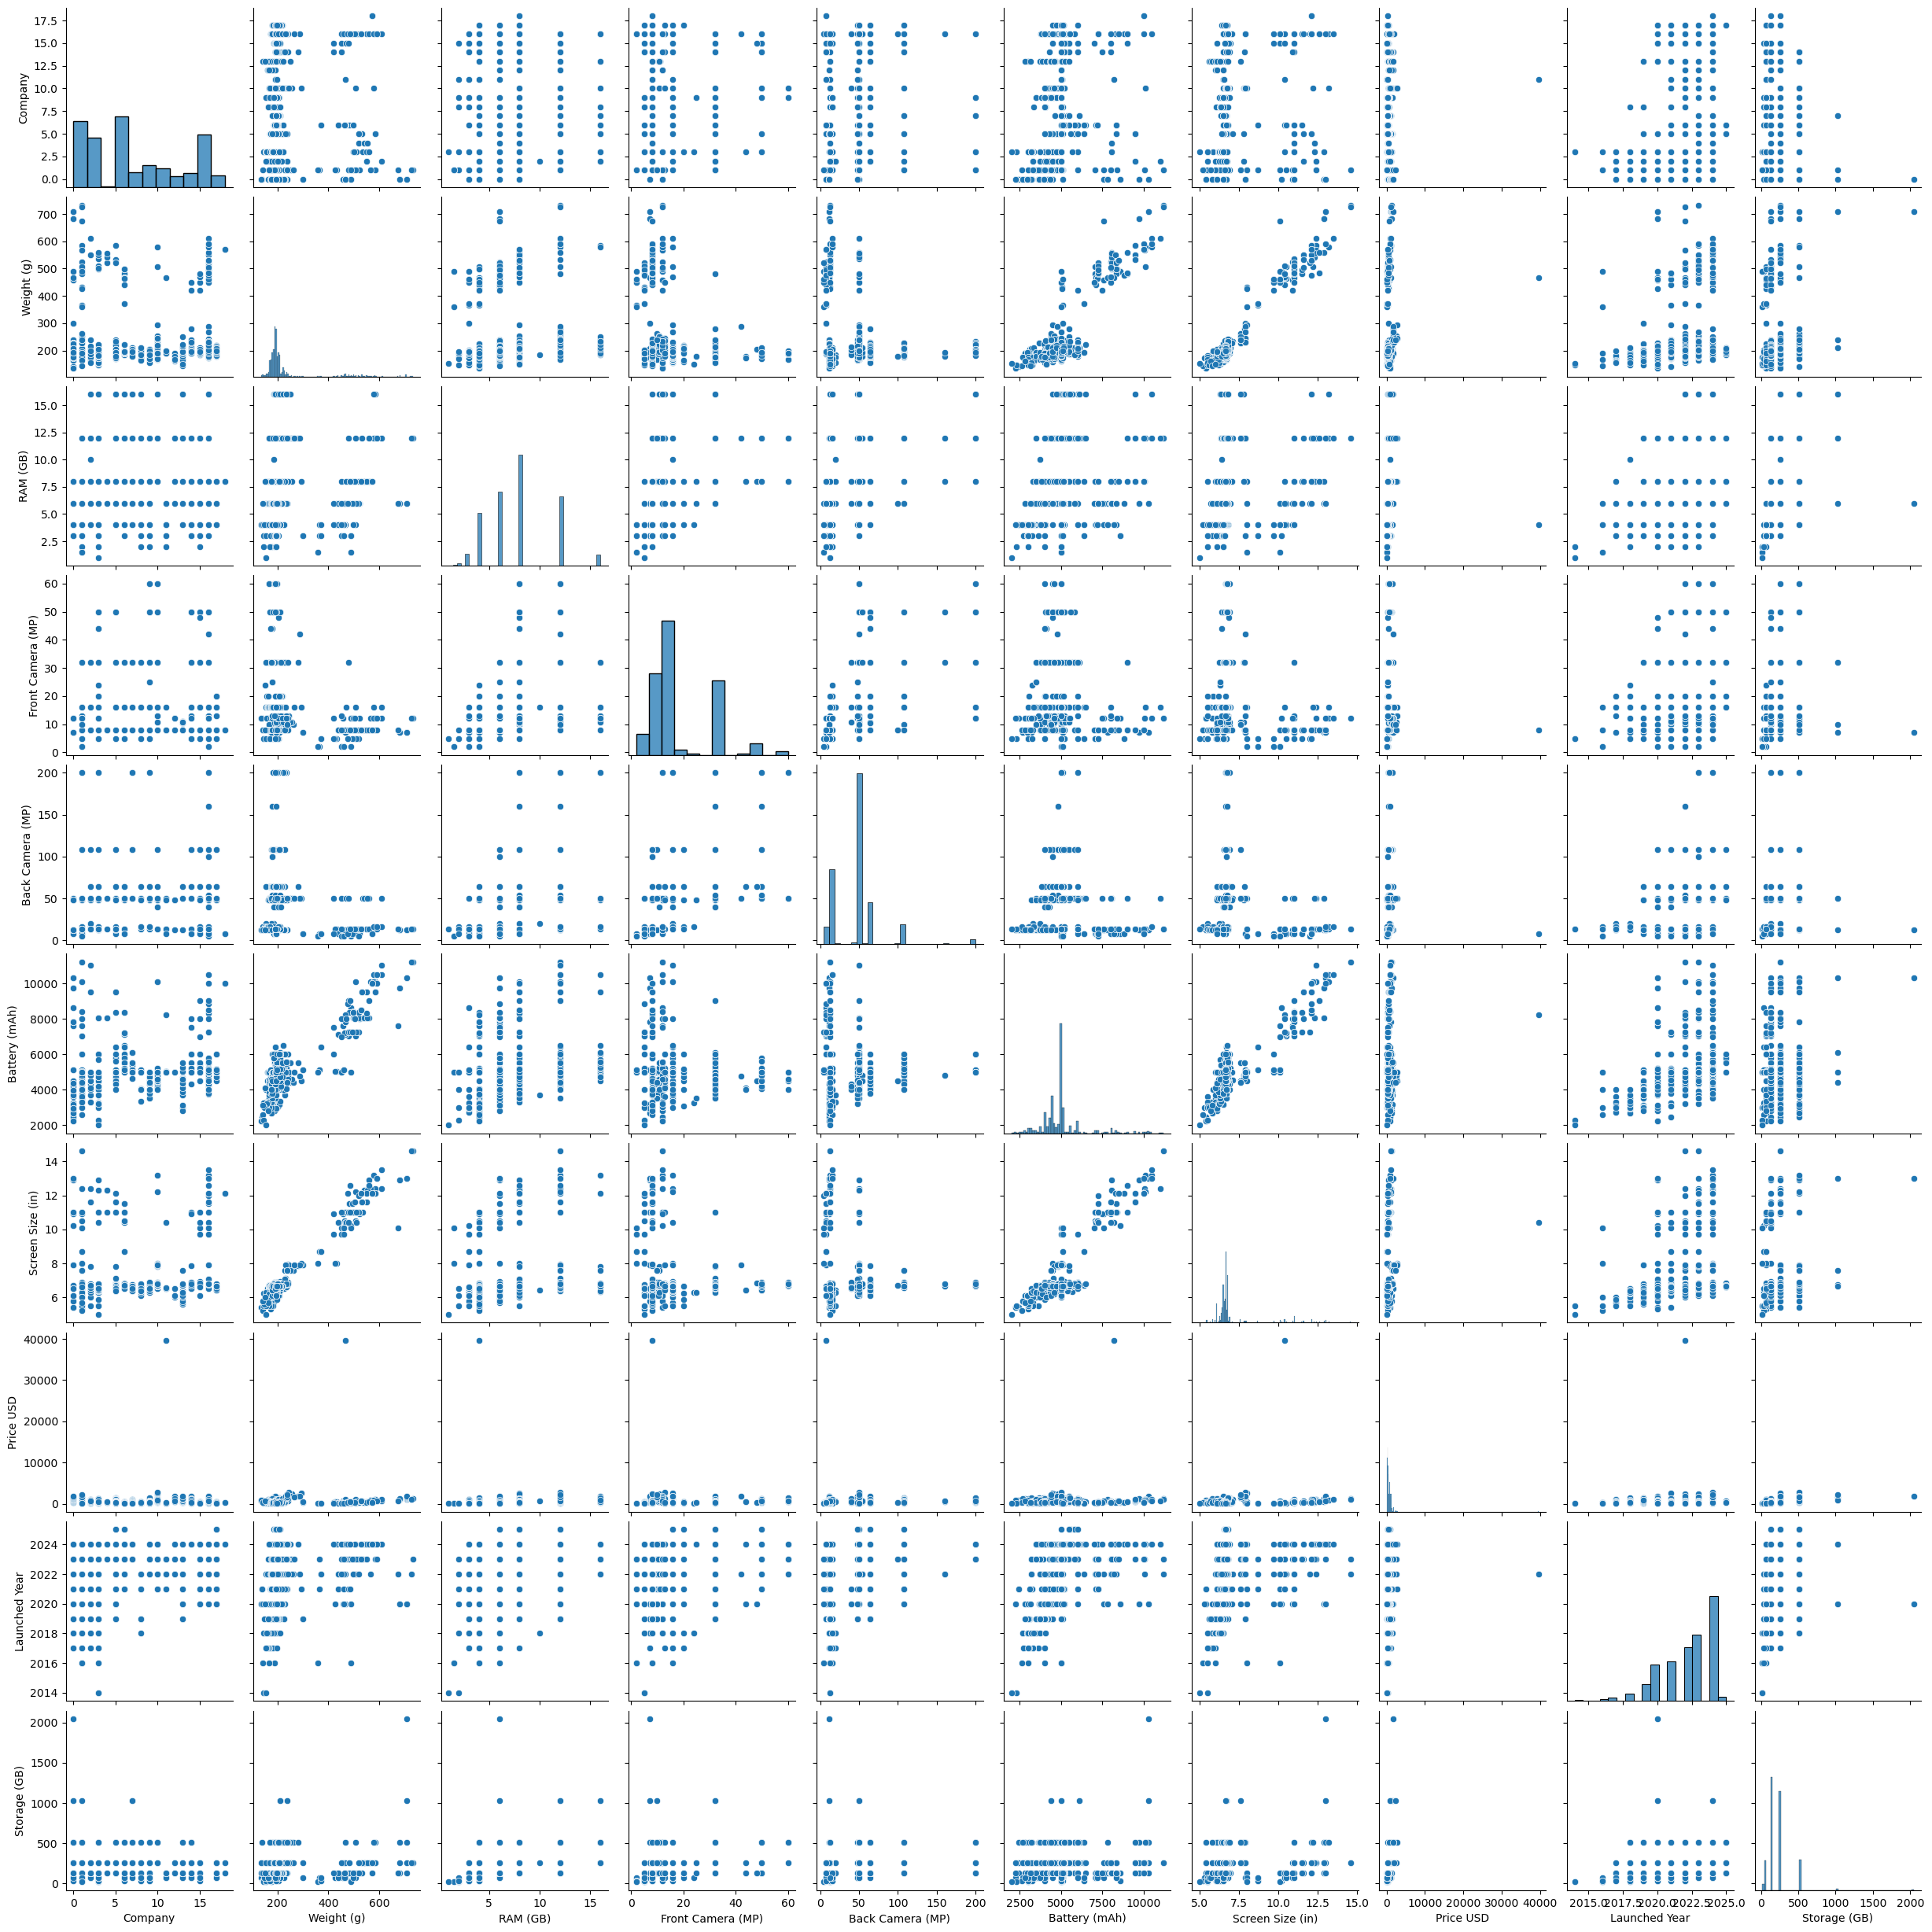

In [42]:
sns.pairplot(df)
plt.show()

The heatmap shows almost no correlation between Price and the other variables. We might need to transform the data or remove outliers. We decided to try a log transformation first over removing outliers, because our sample size went from 930 to 420 with outlier removal. We felt that would decrease our sample size too much and we wanted the extra data.

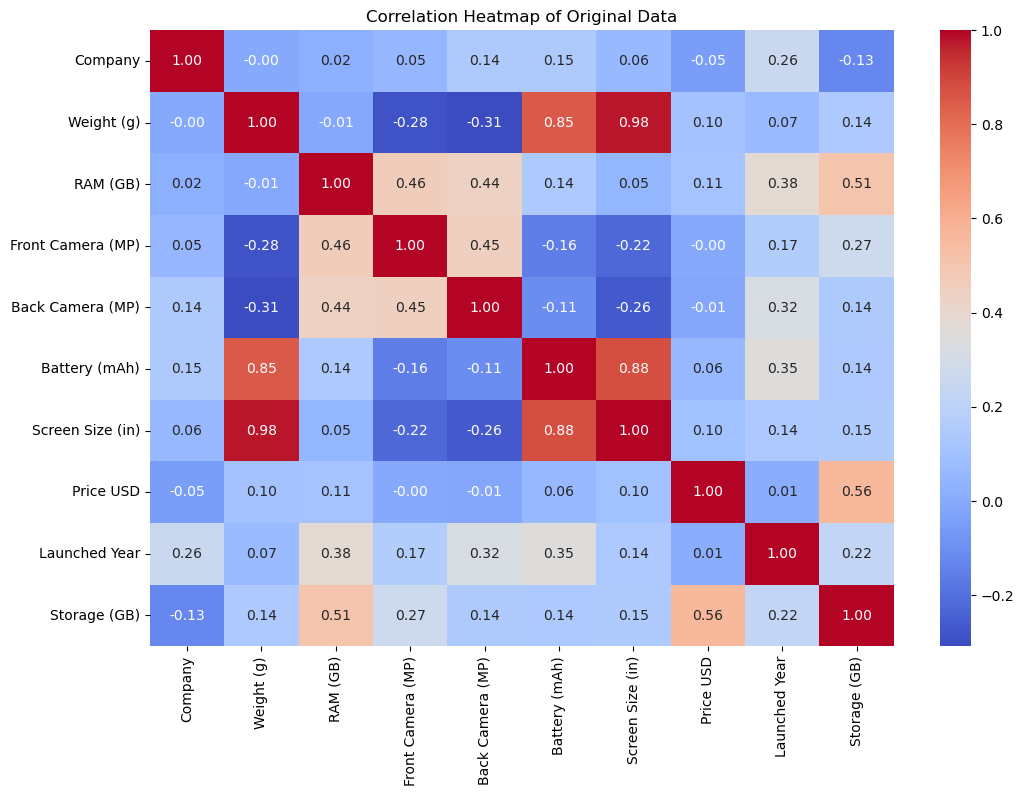

In [45]:
#correlations
corr_matrix = df.corr()

#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Original Data")
plt.show()

With the logarithmic transformation, the heatmap looks better. Price has stronger correlations that we can work with for the models.

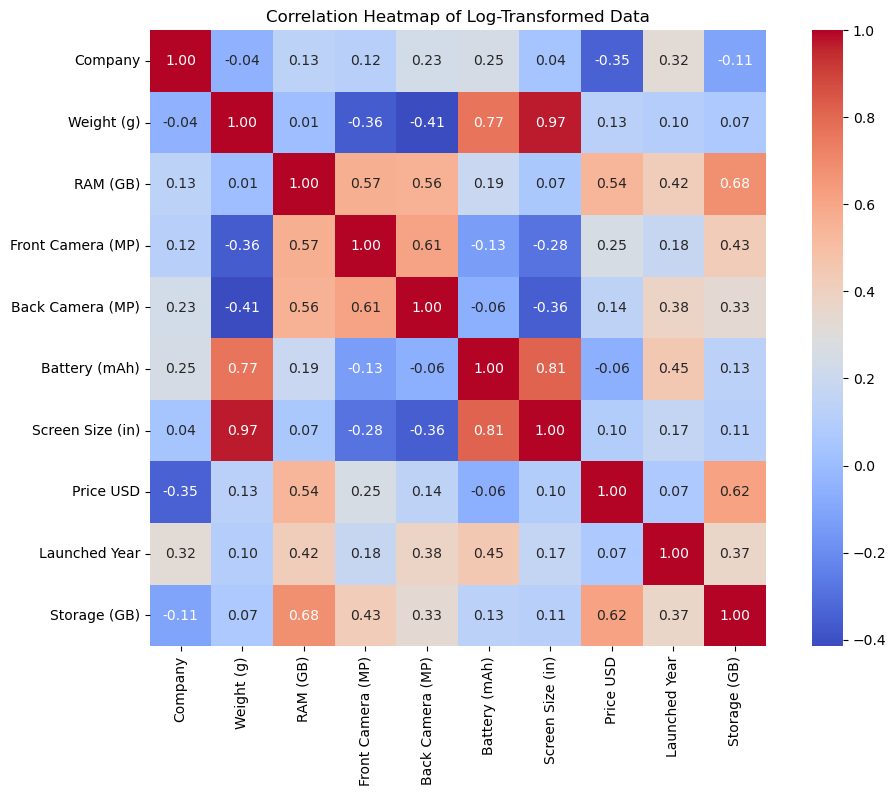

In [48]:
#log transformation
df_log = np.log1p(df)

#correlation
corr_matrix = df_log.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Log-Transformed Data")
plt.show()

Here I am making boxplots of the columns. I want to see if there is any skewness caused by outliers. It looks like Weight, RAM, Battery, and Screen Size have a lot of outliers.

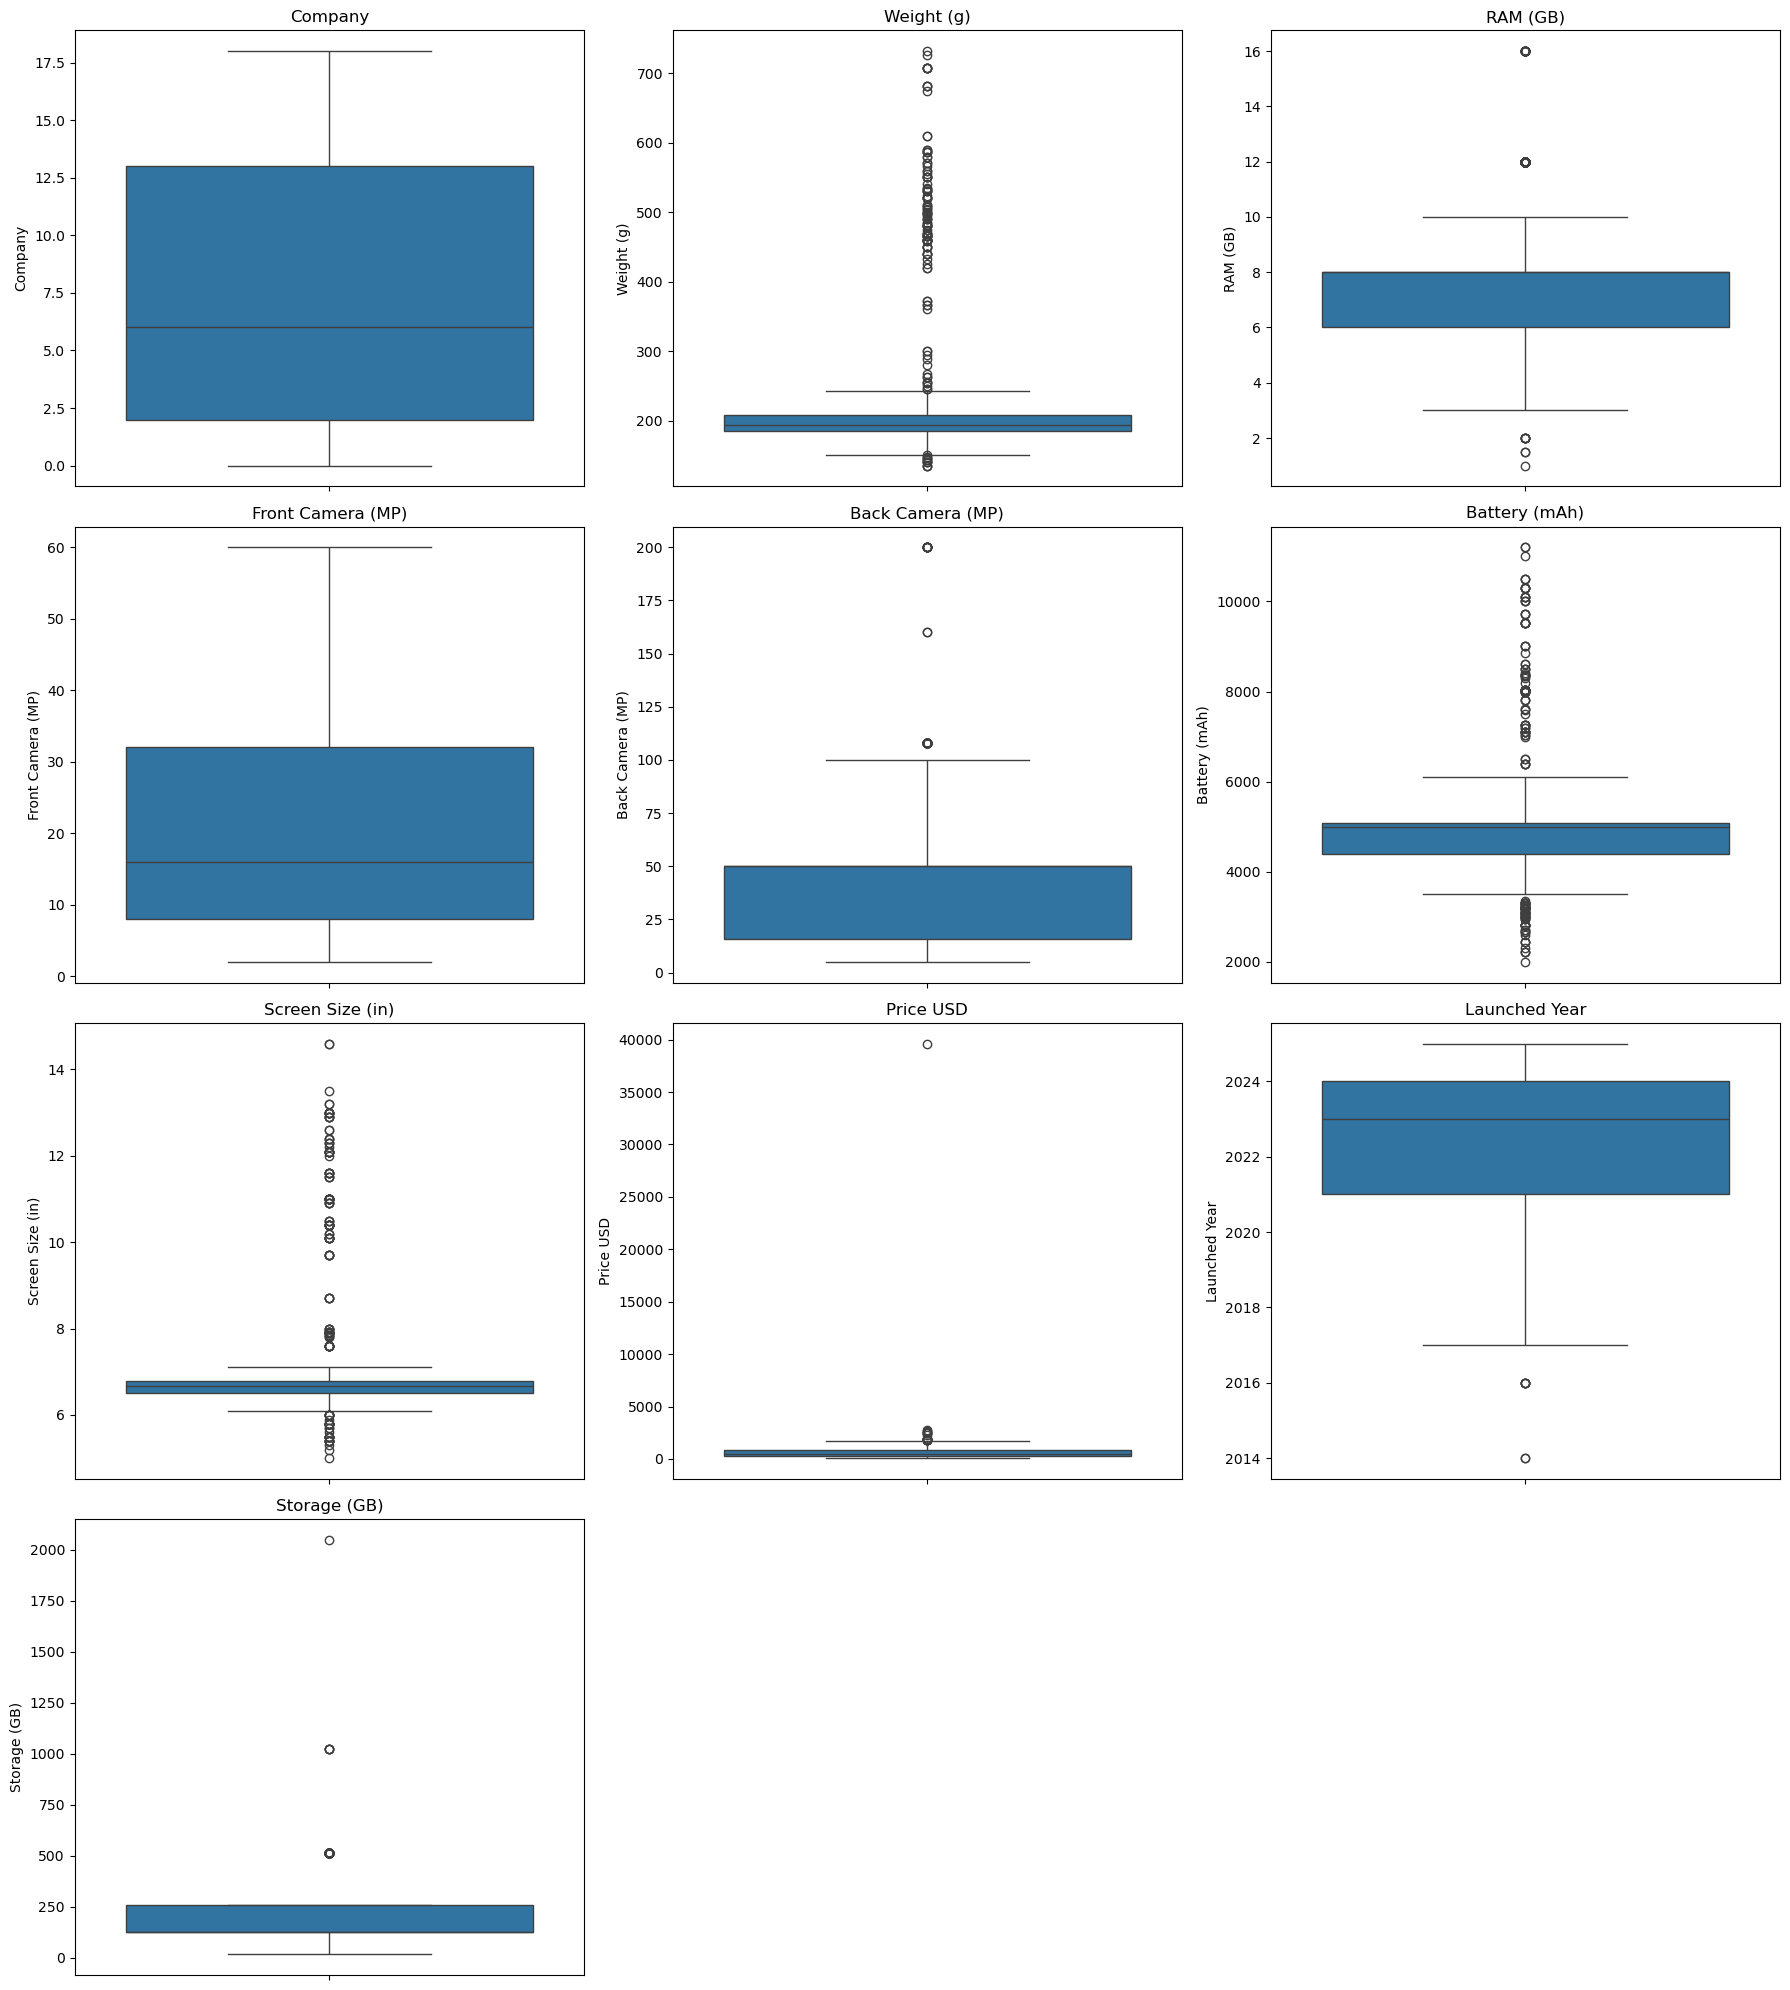

In [51]:
numericCols = df.columns

#3x3 subplot grid
fig, axes = plt.subplots(4, 3, figsize=(18, 20))
axes = axes.flatten()

#plotting
for i, col in enumerate(numericCols[:10]):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

for j in range(len(numericCols), 12):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

To help fix for the skewness we applied a logarithmic transformation. All variables got less skewed and more normal. They aren't perfect, the skewness is better and a promising sign.

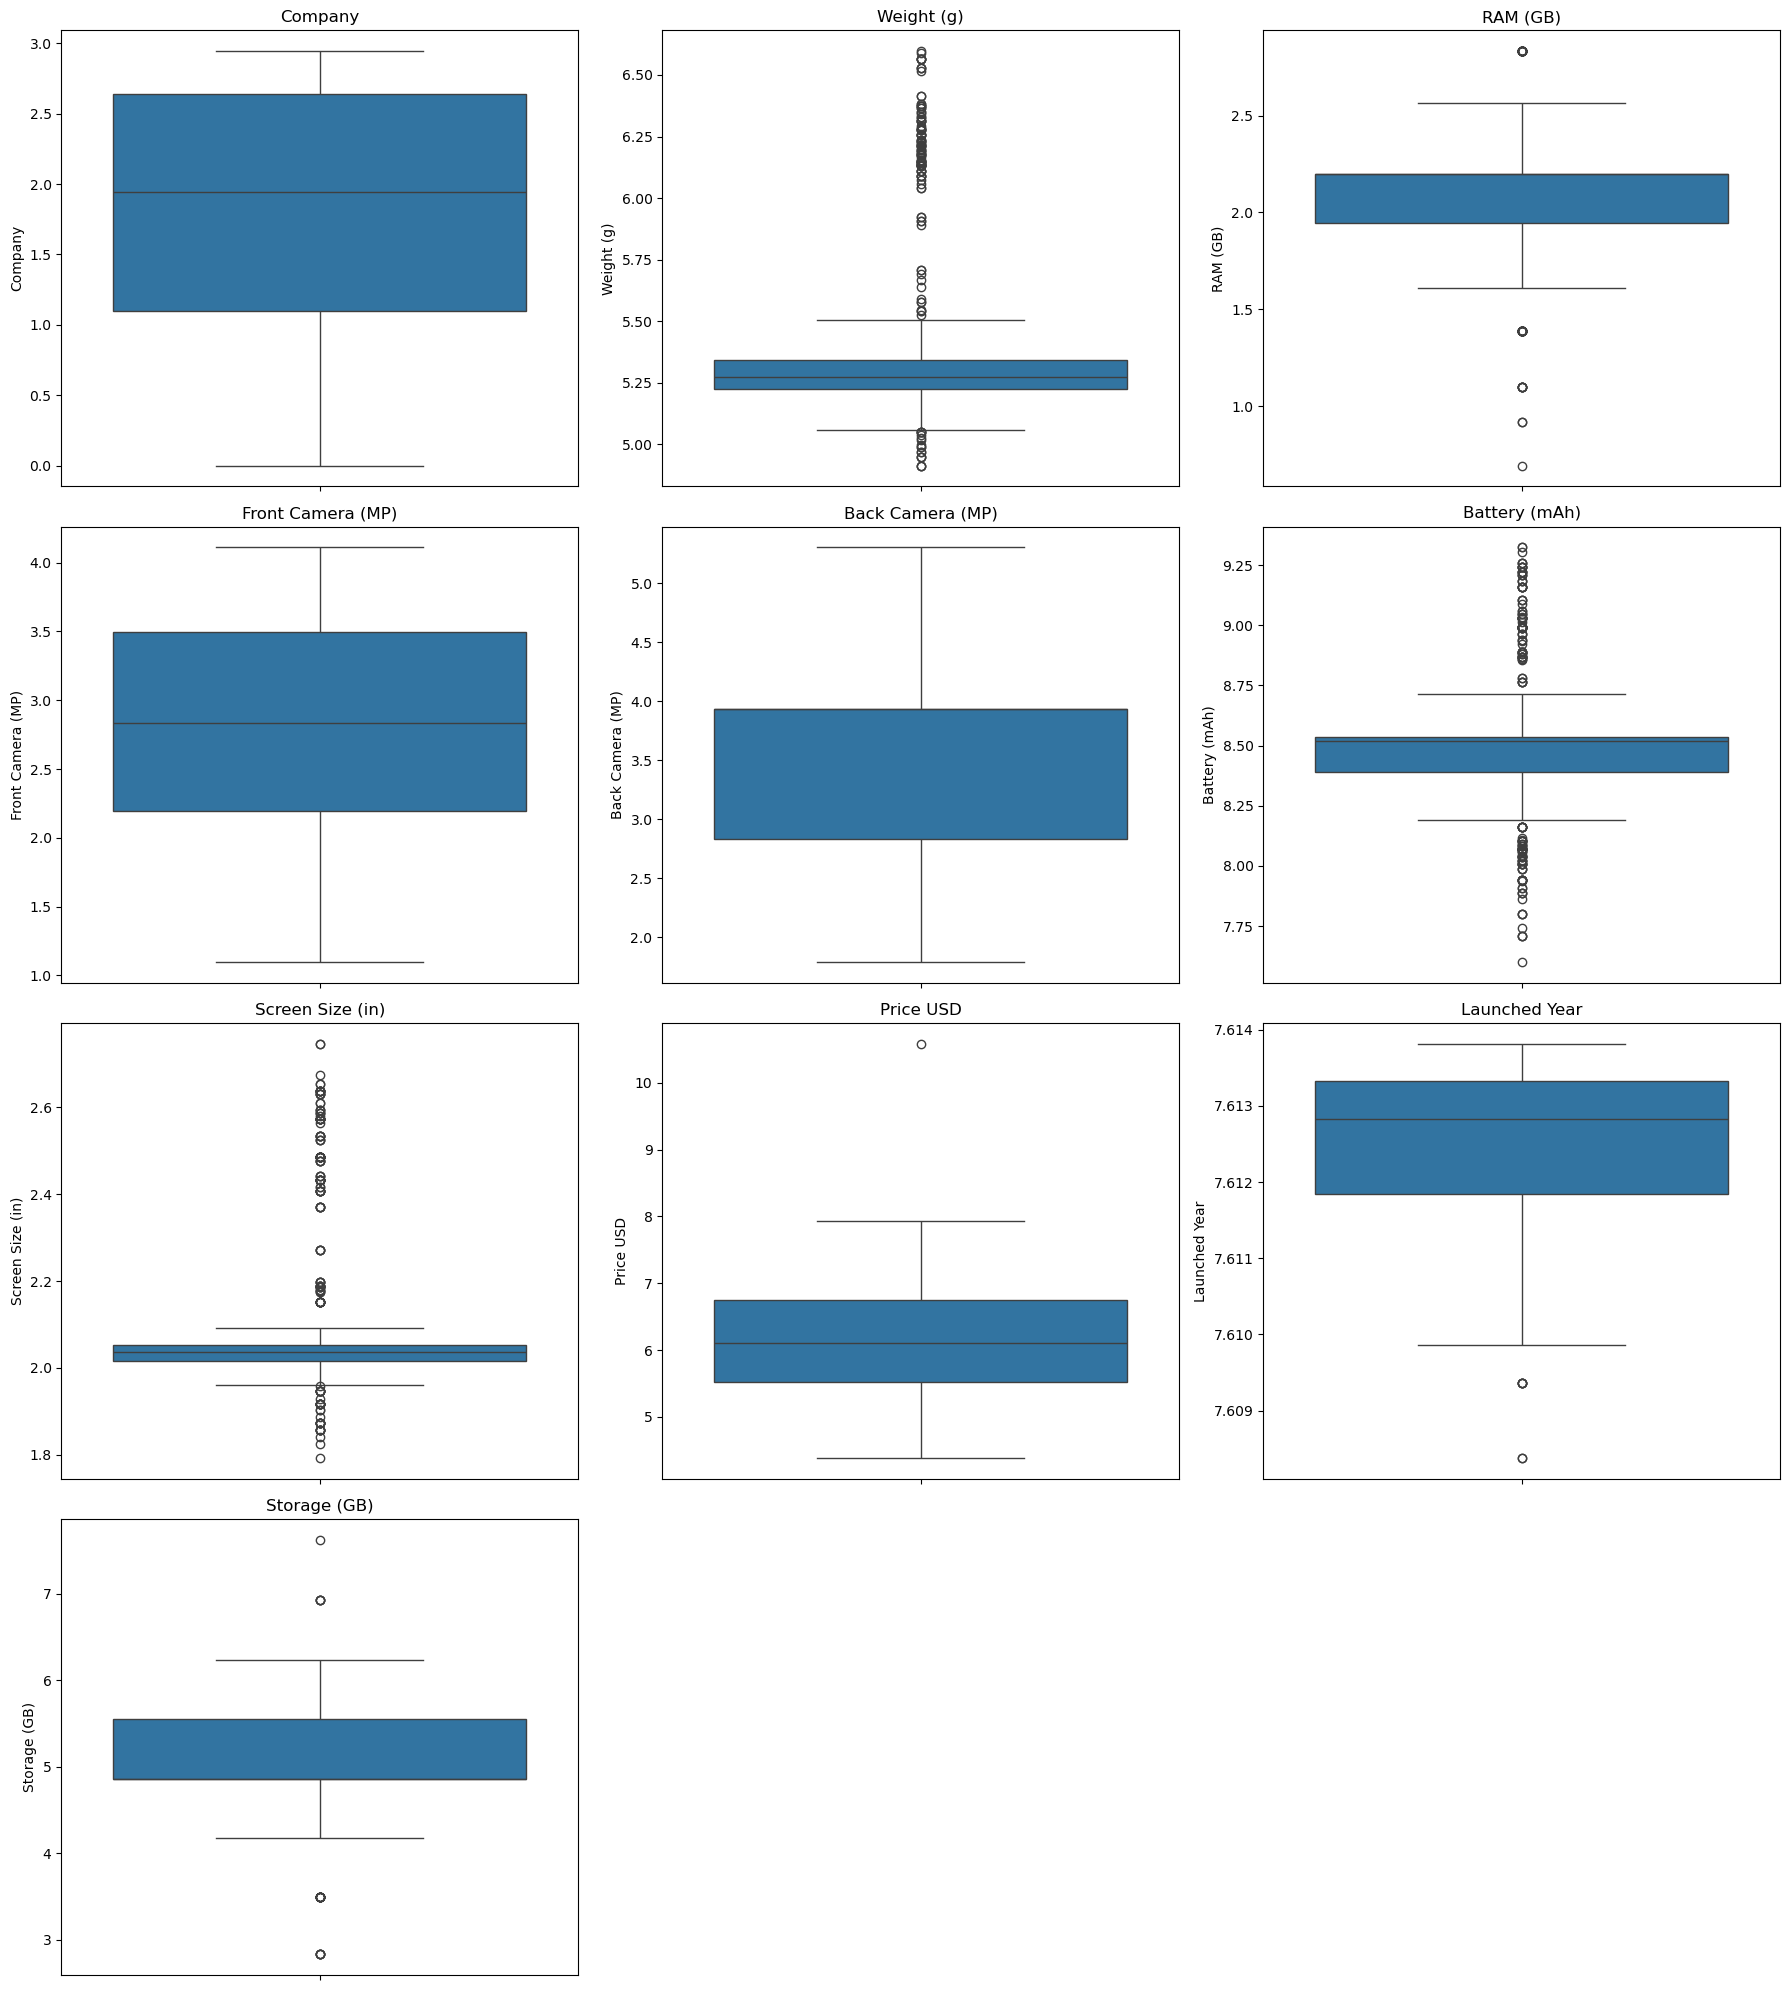

In [54]:
numericCols = df_log.columns

#3x3 subplot grid
fig, axes = plt.subplots(4, 3, figsize=(18, 20))
axes = axes.flatten()

#plotting
for i, col in enumerate(numericCols[:10]):
    sns.boxplot(data=df_log, y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

for j in range(len(numericCols), 12):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

We are investigating the skewness more with histograms of the variables. We can definetly confirm skewness in Weight, Battery, Screen Size and Launch Year. We will see if the transformation helps correct this.

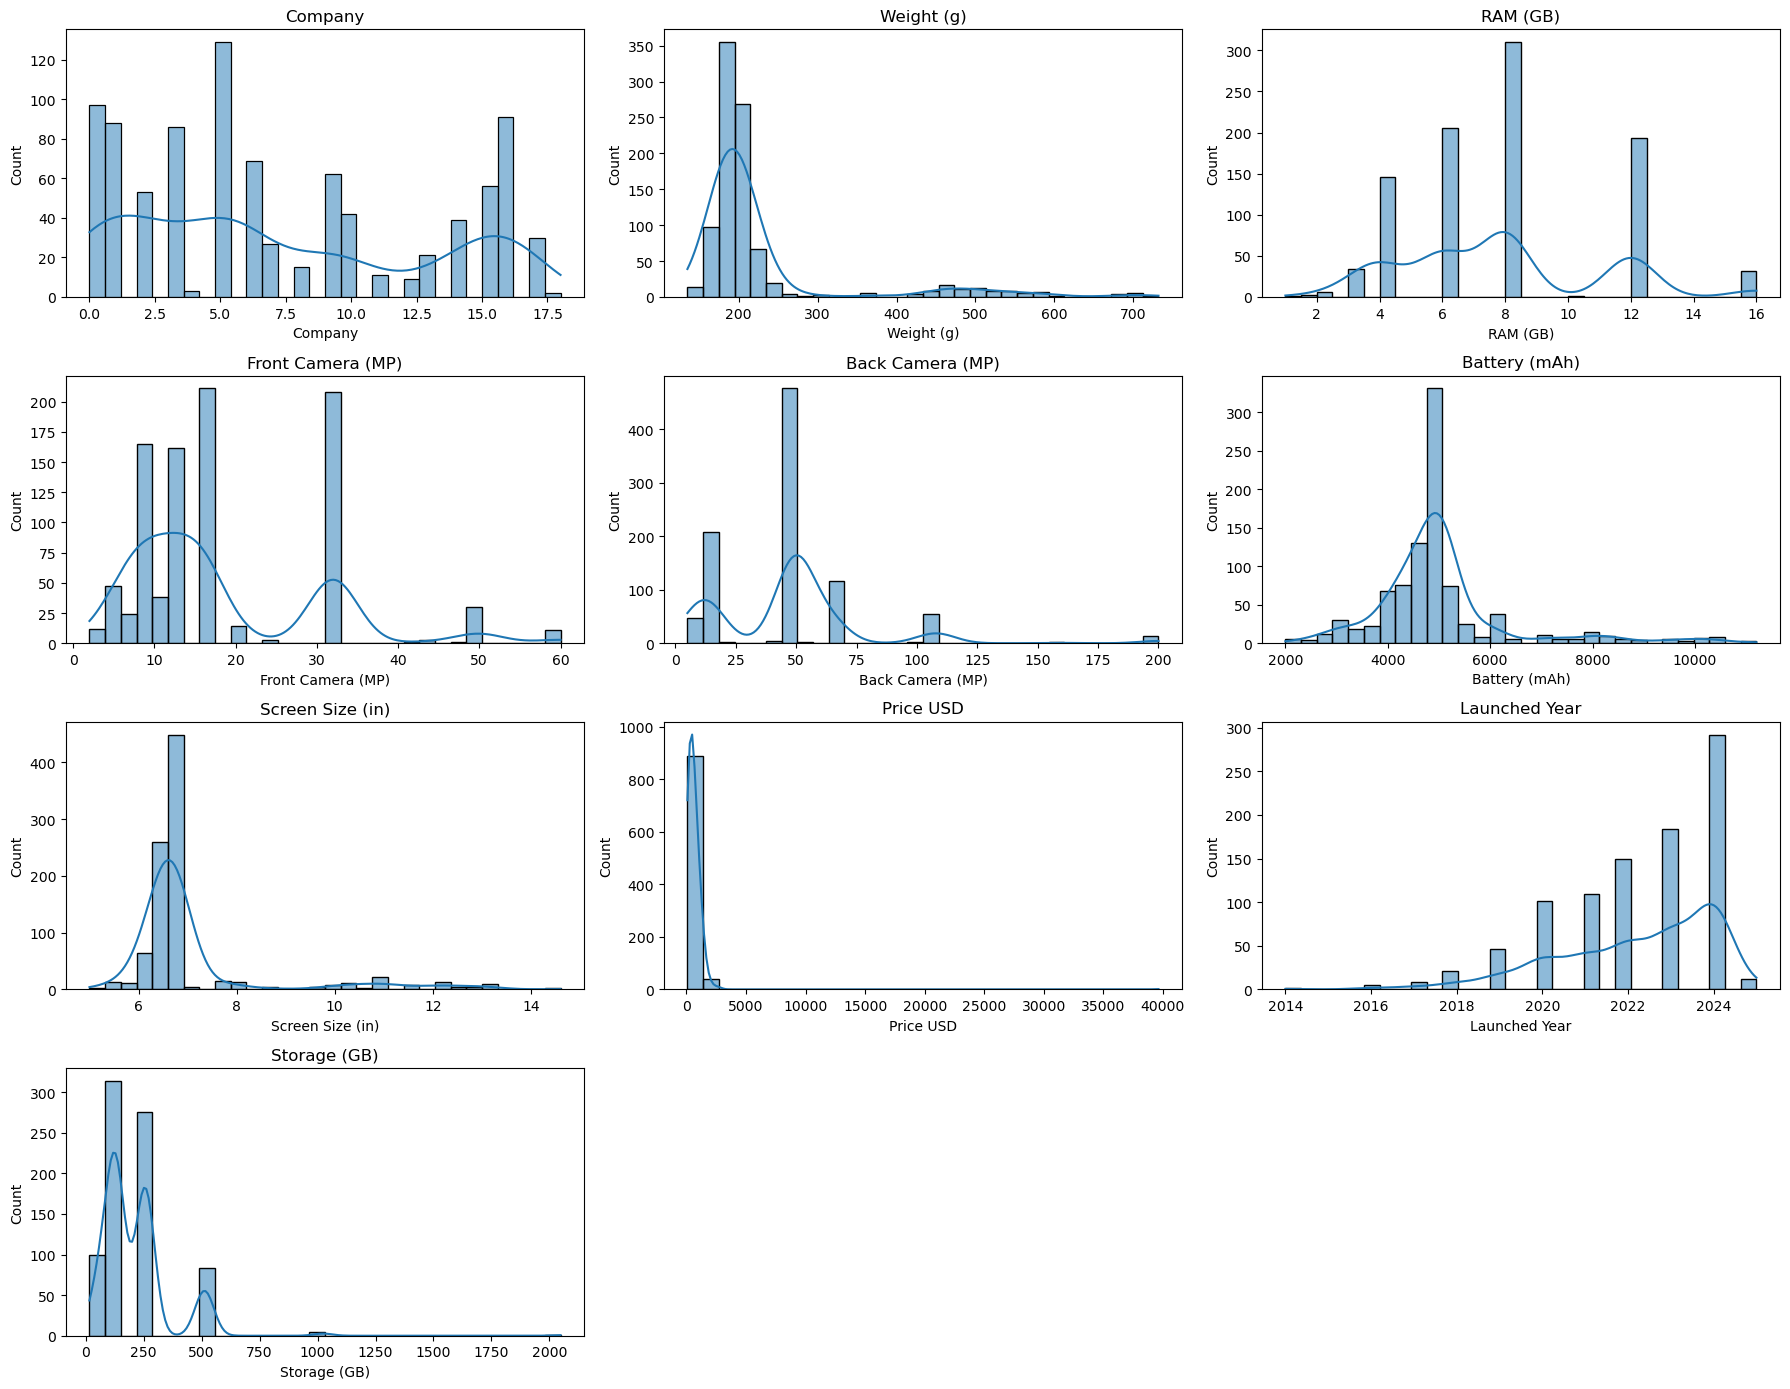

In [57]:
plt.figure(figsize=(18, 14))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
    plt.tight_layout()
plt.show()

Skewness gets better for all columns. They are starting to look more normal. We will use the logarithmic transformed data for our preliminary models and adjust the data more if needed.

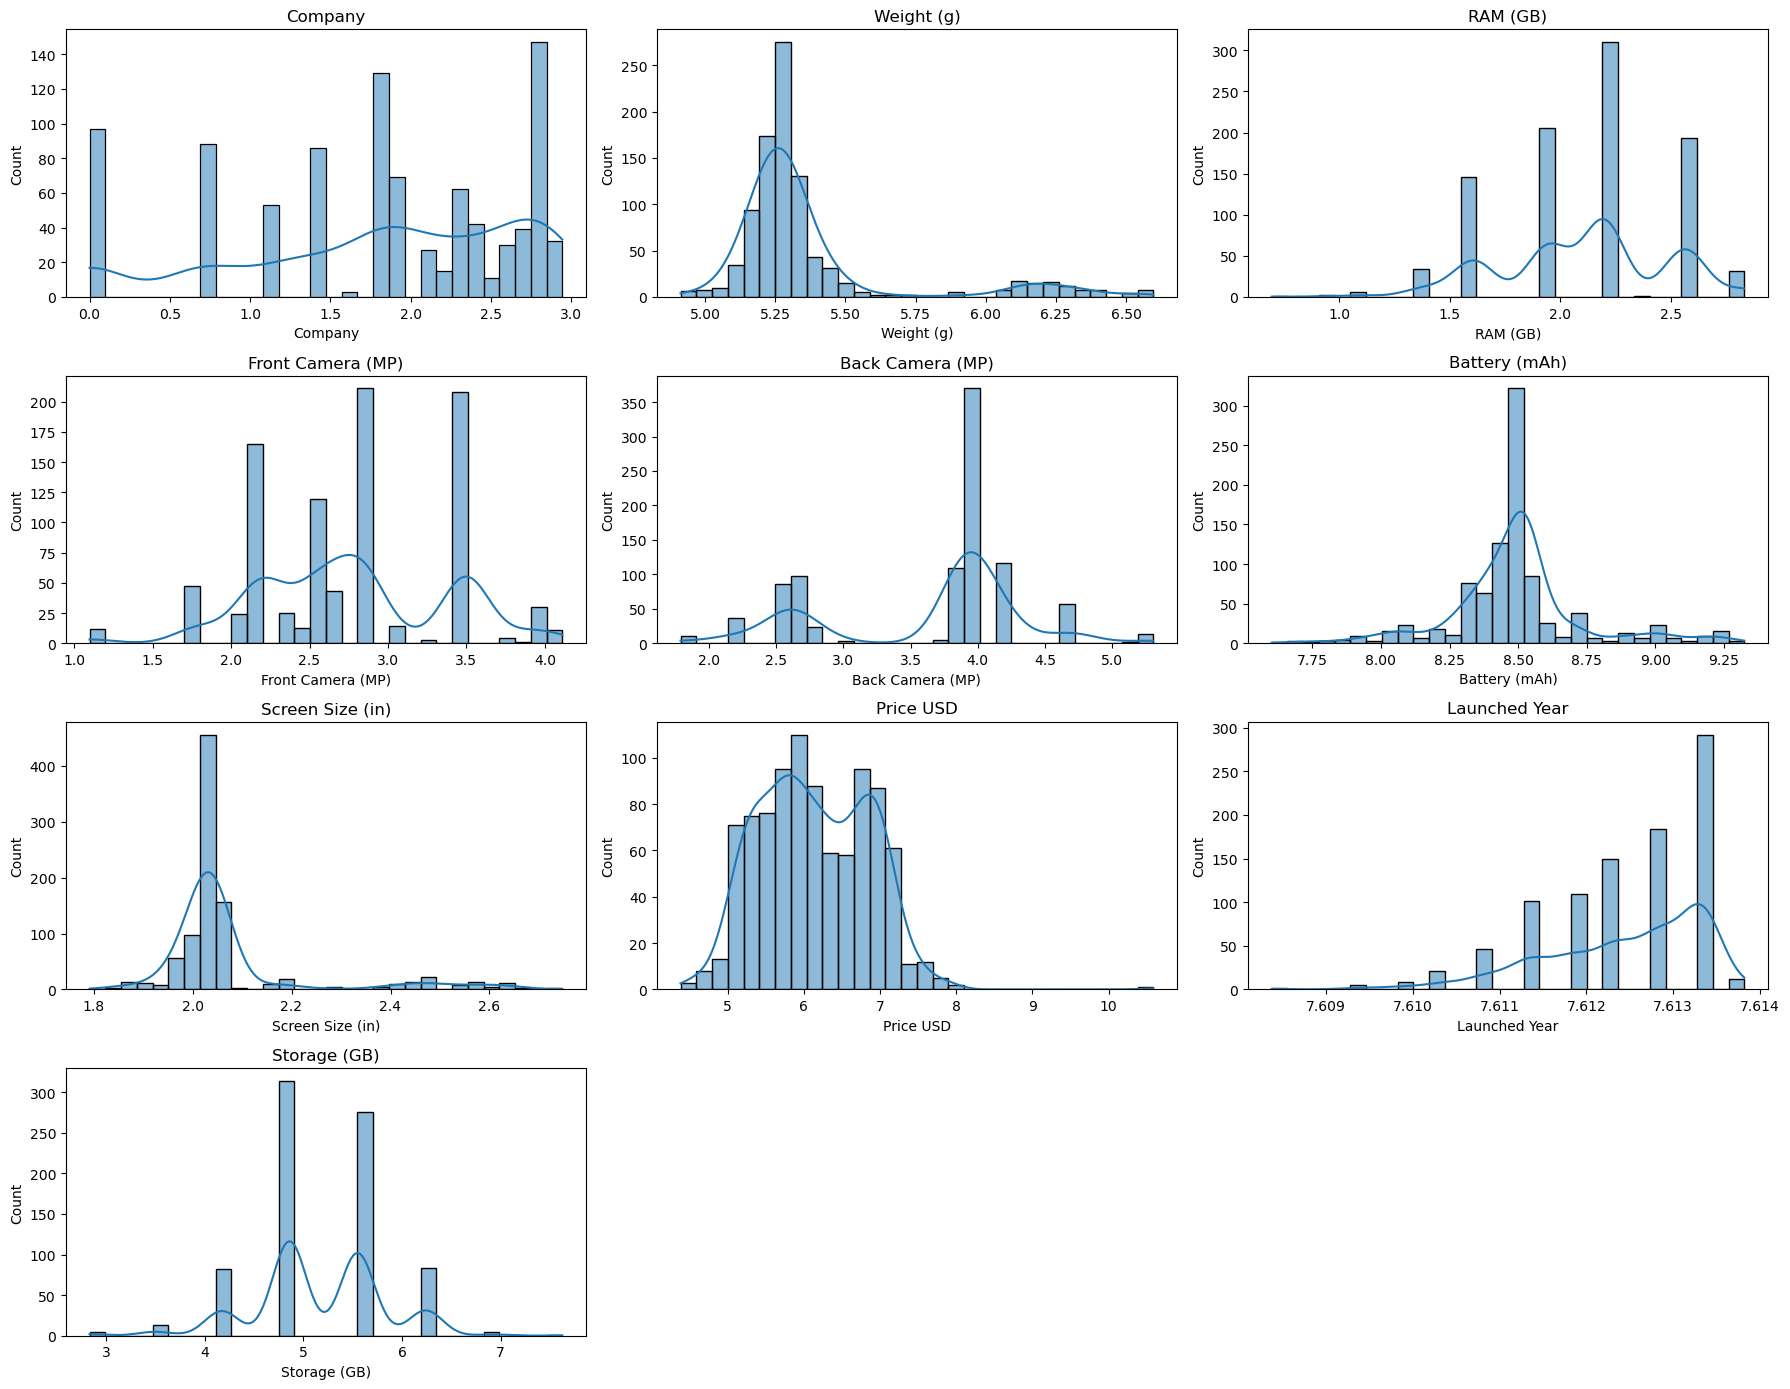

In [60]:
plt.figure(figsize=(18, 14))
for i, col in enumerate(df_log.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_log[col], kde=True, bins=30)
    plt.title(col)
    plt.tight_layout()

plt.show()

This Q-Q plot show us that our logarithmic data is normally distributed.

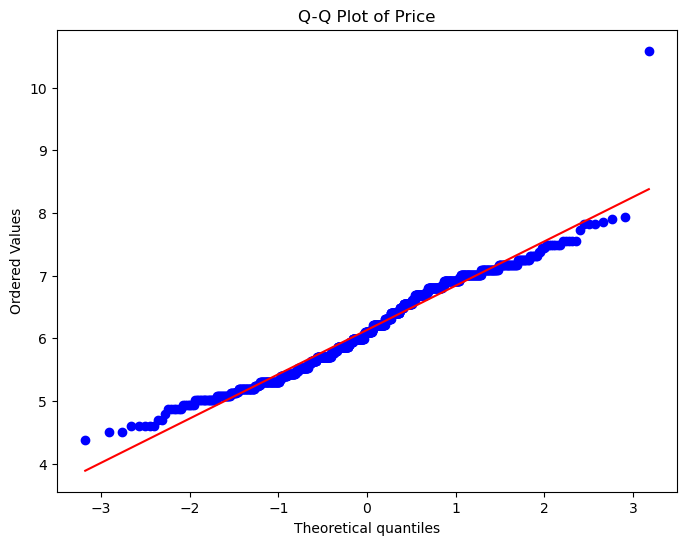

In [63]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df_clean = pd.read_csv('cleaned_mobile_data.csv')

# Pick the column you want (e.g., 'Price')
price = np.log1p(df_clean['Price USD'])

#create the Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(price, dist="norm", plot=plt)
plt.title("Q-Q Plot of Price")
plt.show()

PCA

In [66]:
# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

df = df.dropna()

# PCA to see which columns contribute the most to the principal components (variance)
features = df.columns.tolist()

# Standardize the features (crucial for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(scaled_data)
contributions = pd.DataFrame(np.abs(pca.components_), columns = features, index=[f"PC{i+1}" for i in range(pca.n_components_)])

feature_contributions = contributions.mean().sort_values(ascending=False)

feature_contributions

Weight (g)           0.331911
Screen Size (in)     0.315844
RAM (GB)             0.305361
Storage (GB)         0.288378
Front Camera (MP)    0.268348
Battery (mAh)        0.264525
Back Camera (MP)     0.258295
Price USD            0.225417
Launched Year        0.221848
Company              0.035838
dtype: float64

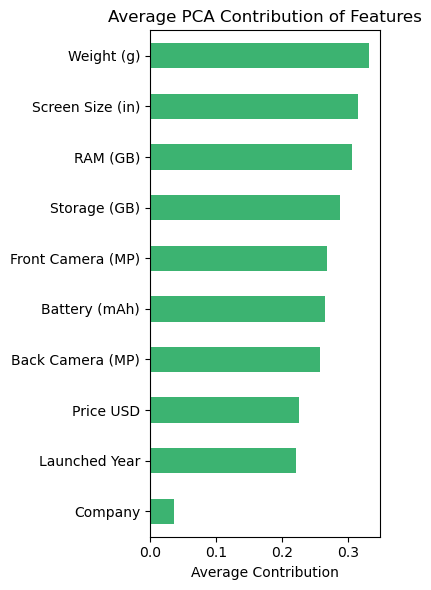

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 6))
feature_contributions.plot(kind='barh', color='mediumseagreen')
plt.title('Average PCA Contribution of Features')
plt.xlabel('Average Contribution')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

Random Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['Price USD'])
y = df['Price USD']
# Random Forest classifier
rf_model = RandomForestRegressor(n_estimators=100, random_state=1227)
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

             Feature  Importance
0            Company    0.205113
8       Storage (GB)    0.201037
1         Weight (g)    0.147486
2           RAM (GB)    0.146865
3  Front Camera (MP)    0.116971
6   Screen Size (in)    0.079146
5      Battery (mAh)    0.060724
4   Back Camera (MP)    0.031305
7      Launched Year    0.011351


<Figure size 400x1000 with 0 Axes>

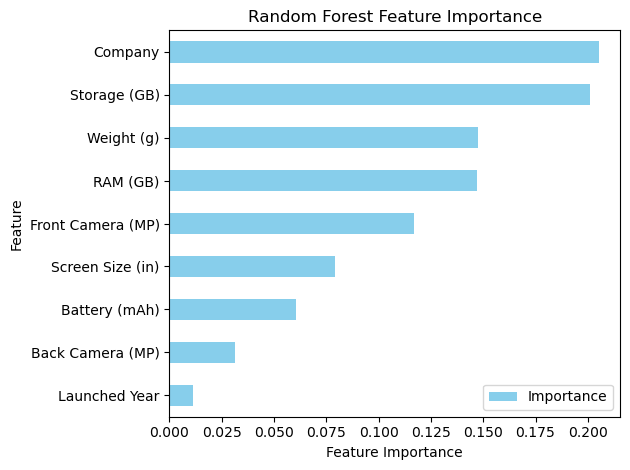

In [73]:
import matplotlib.pyplot as plt

# Make sure graph shows feature instead of number
feature_importances.set_index('Feature', inplace=True)

plt.figure(figsize=(4, 10))
feature_importances.plot(kind='barh', color='SkyBlue')
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

Might be worth getting rid of Back Camera and Launched Year since they do so little for the dataset...

In [76]:
# Run same code but without the bottom two variables...

X = df.drop(columns=['Price USD', 'Launched Year', 'Back Camera (MP)'])
y = df['Price USD']
# Random Forest classifier
rf_model = RandomForestRegressor(n_estimators=100, random_state=1227)
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

             Feature  Importance
0            Company    0.209329
6       Storage (GB)    0.203388
1         Weight (g)    0.154539
2           RAM (GB)    0.151615
3  Front Camera (MP)    0.124570
5   Screen Size (in)    0.084353
4      Battery (mAh)    0.072206


<Figure size 400x1000 with 0 Axes>

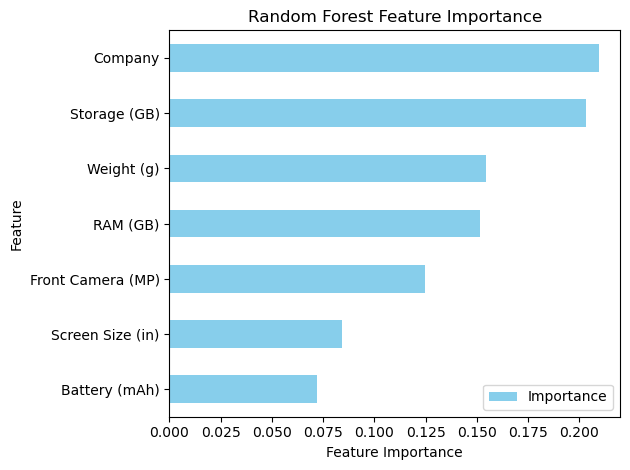

In [78]:
import matplotlib.pyplot as plt

# Make sure graph shows feature instead of number
feature_importances.set_index('Feature', inplace=True)

plt.figure(figsize=(4, 10))
feature_importances.plot(kind='barh', color='SkyBlue')
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

KNN

In [81]:
# Regression based on k-nearest neighbors

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = df.drop(columns=['Price USD', 'Launched Year', 'Back Camera (MP)'])
y = df['Price USD']

# Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1227)

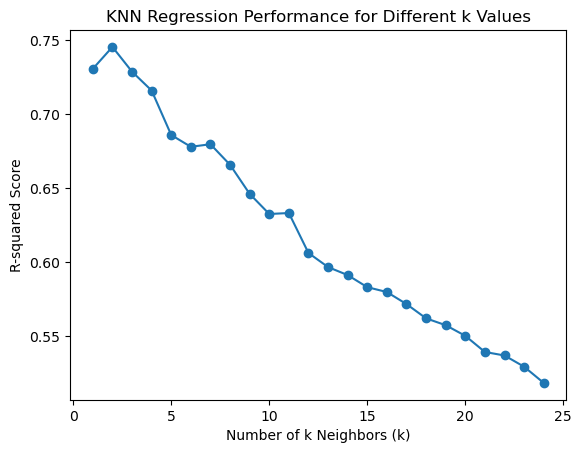

In [83]:
# Test different values of n_neighbors
neighbor_values = range(1, 25)
r2_scores = []

# KNN models for every 'n' value
for n in neighbor_values:
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

# Plot results
plt.plot(neighbor_values, r2_scores, marker='o')
plt.xlabel("Number of k Neighbors (k)")
plt.ylabel("R-squared Score")
plt.title("KNN Regression Performance for Different k Values")
plt.show()

In [85]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f'R-squared Score: {r2:.2f}')

Mean Absolute Error (MAE): 145.18
Mean Squared Error (MSE): 43664.96
R-squared Score: 0.69


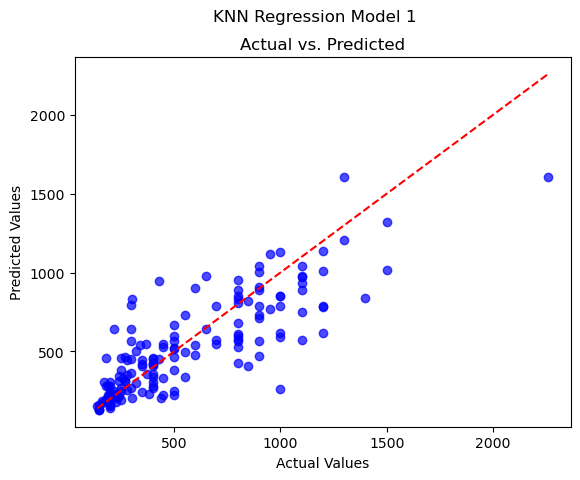

In [87]:
plt.scatter(y_test, y_pred, color='blue', alpha = 0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")  # Ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.suptitle("KNN Regression Model 1")
plt.title("Actual vs. Predicted")
plt.show()

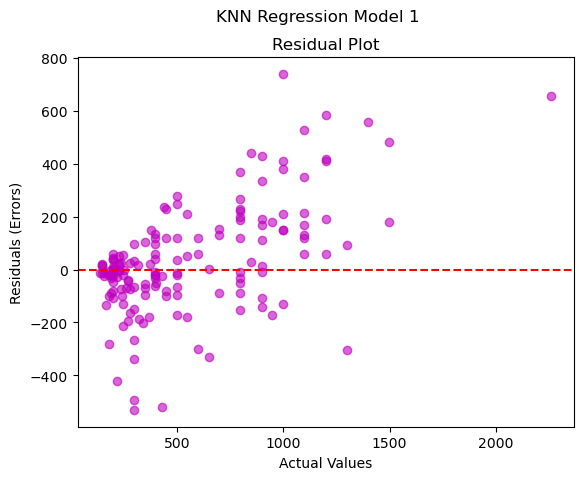

In [89]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals, color='m', alpha=0.6)
plt.axhline(y = 0, color='red', linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")
plt.suptitle("KNN Regression Model 1")
plt.show()

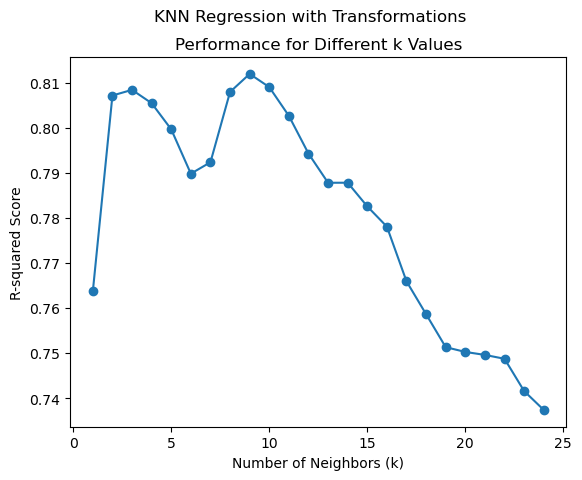

In [91]:
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# ln(y) transformation
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

neighbor_values = range(1, 25)
r2_scores = []

for n in neighbor_values:
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train_scaled, y_train_log)
    y_pred = knn.predict(X_test_scaled)
    r2_scores.append(r2_score(y_test_log, y_pred))

# Plot results
plt.plot(neighbor_values, r2_scores, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("R-squared Score")
plt.title("Performance for Different k Values")
plt.suptitle("KNN Regression with Transformations")
plt.show()

In [93]:
# Finding the best Parameters
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 50), 'weights': ['uniform', 'distance'],  'metric' : ['manhattan', 'minkowski' ]}
knn = KNeighborsRegressor()

# Grid Search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2') # cv = 5-fold cross validation
grid_search.fit(X_train_scaled, y_train_log)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [94]:
best_knn = KNeighborsRegressor(n_neighbors = 5, weights = 'distance', metric = 'manhattan')
best_knn.fit(X_train_scaled, y_train_log)

# y_pred = best_knn.predict(X_test_scaled)

# mae = mean_absolute_error(y_test_log, y_pred)
# mse = mean_squared_error(y_test_log, y_pred)
# r2 = r2_score(y_test_log, y_pred)


# print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(f'R-squared Score: {r2:.2f}')

KNeighborsRegressor(metric='manhattan', weights='distance')

In [97]:
y_pred = best_knn.predict(X_test_scaled)

y_pred_exp = np.expm1(y_pred)
y_test_exp = np.expm1(y_test_log)

mae = mean_absolute_error(y_test_exp, y_pred_exp)
mse = mean_squared_error(y_test_exp, y_pred_exp)
r2 = r2_score(y_test_exp, y_pred_exp)

print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f'R-squared Score: {r2:.2f}')

Mean Absolute Error (MAE): $87.66
Mean Squared Error (MSE): $20183.56
R-squared Score: 0.85


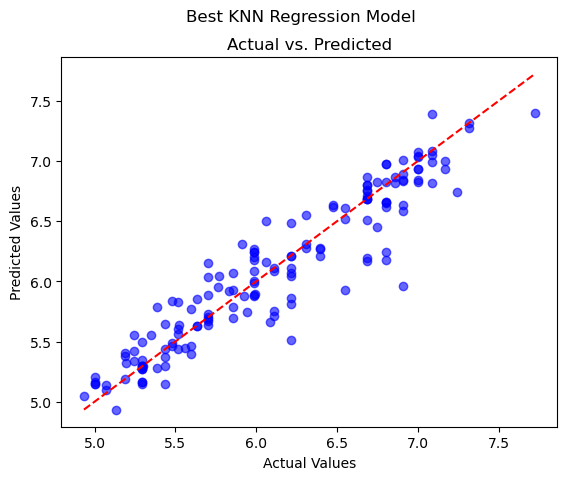

In [99]:
plt.scatter(y_test_log, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test_log), max(y_test_log)], [min(y_test_log), max(y_test_log)], color='red', linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.suptitle("Best KNN Regression Model")
plt.show()

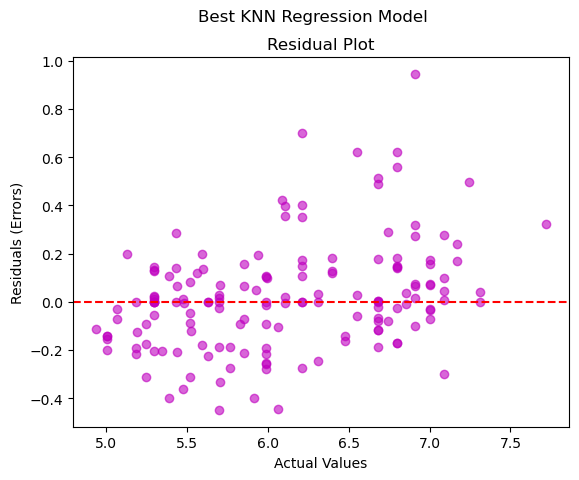

In [101]:
residuals = y_test_log - y_pred

# Residual Plot
plt.scatter(y_test_log, residuals, color='m', alpha=0.6)
plt.axhline(y=0, color='red', linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")
plt.suptitle("Best KNN Regression Model")

plt.show()

Linear Regression

In [104]:
import pandas as pd

df = pd.read_csv("cleaned_mobile_data.csv")
df = df.dropna(axis=1)
df

,Company,Weight (g),RAM (GB),Front Camera (MP),Back Camera (MP),Battery (mAh),Screen Size (in),Price USD,Launched Year
0,0,174.0,6.0,12.0,48.0,3600.0,6.1,799.0,2024
1,0,174.0,6.0,12.0,48.0,3600.0,6.1,849.0,2024
2,0,174.0,6.0,12.0,48.0,3600.0,6.1,899.0,2024
3,0,203.0,6.0,12.0,48.0,4200.0,6.7,899.0,2024
4,0,203.0,6.0,12.0,48.0,4200.0,6.7,949.0,2024
...,...,...,...,...,...,...,...,...,...
925,18,571.0,8.0,8.0,8.0,10000.0,12.1,280.0,2024
926,18,571.0,8.0,8.0,8.0,10000.0,12.1,300.0,2024
927,1,239.0,12.0,10.0,50.0,4400.0,7.6,1899.0,2024
928,1,239.0,12.0,10.0,50.0,4400.0,7.6,1719.0,2024


In [106]:
#Linear Regression Model 1 No transformations
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Price USD', 'Launched Year', 'Back Camera (MP)'])
y = df['Price USD'] 

#split x and y into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1227)

#fit linear model
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

#print mae, mse, and r-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
error = y_test - y_pred

print(f"Mean Absolute Error: {mae:.2f}", )
print(f"Mean Squared Error: {mse:.2f}", )
print(f"R-squared: {r2:.2f}", )

Mean Absolute Error: 248.59
Mean Squared Error: 97593.79
R-squared: 0.32


<Axes: xlabel='Battery (mAh)'>

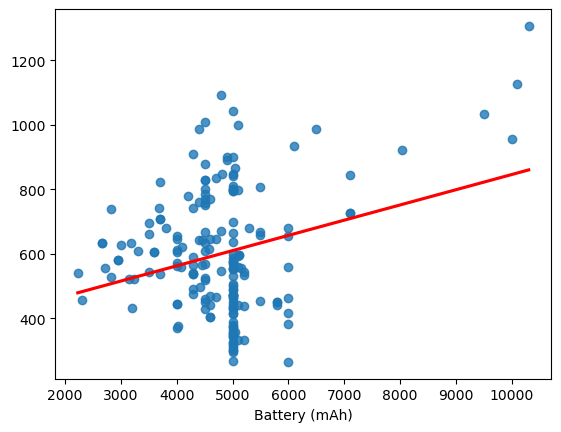

In [108]:
import matplotlib.pyplot as mplt

#plot relationship between battery and US pricing
plt = sns.regplot(x=X_test['Battery (mAh)'], y=y_pred, data=df, ci=None, line_kws={"color": "red"})
plt

<Axes: xlabel='Weight (g)'>

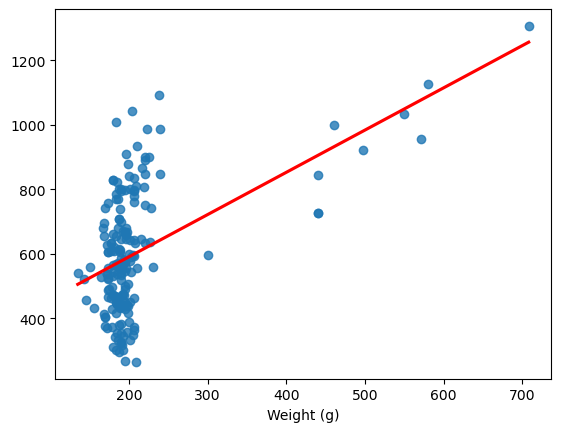

In [110]:
#plot relationship between phone weight and US pricing

plt2 = sns.regplot(x=X_test['Weight (g)'], y=y_pred, data=df, ci=None, line_kws={"color": "red"})
plt2

<Axes: xlabel='Company'>

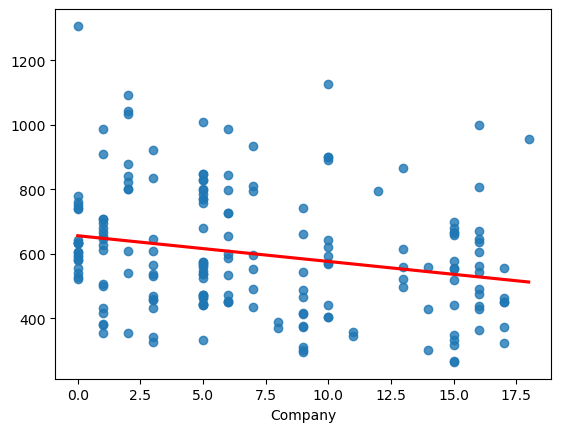

In [112]:
#plot relationship between company and US pricing

plt3 = sns.regplot(x=X_test['Company'], y=y_pred, data=df, ci=None, line_kws={"color": "red"})
plt3

<Axes: xlabel='RAM (GB)'>

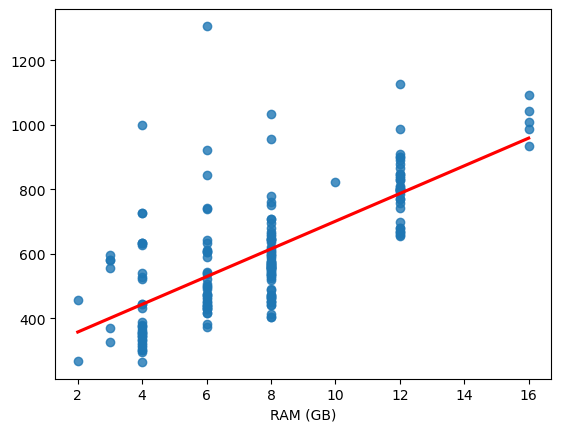

In [114]:
#plot relationship between RAM and US pricing

plt4 = sns.regplot(x=X_test['RAM (GB)'], y=y_pred, data=df, ci=None, line_kws={"color": "red"})
plt4

<Axes: xlabel='Screen Size (in)'>

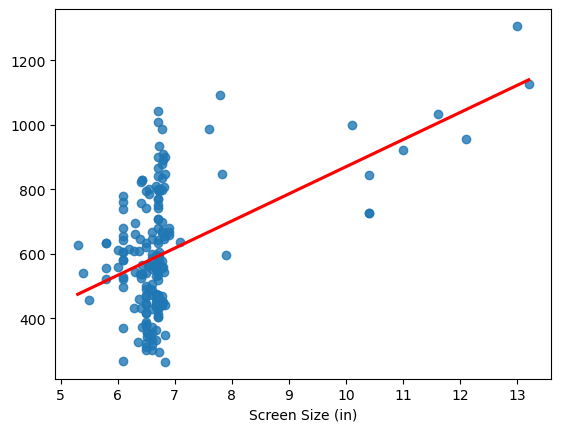

In [116]:
#plot relationship between screen size and US pricing

plt5 = sns.regplot(x=X_test['Screen Size (in)'], y=y_pred, data=df, ci=None, line_kws={"color": "red"})
plt5

<Axes: xlabel='Front Camera (MP)'>

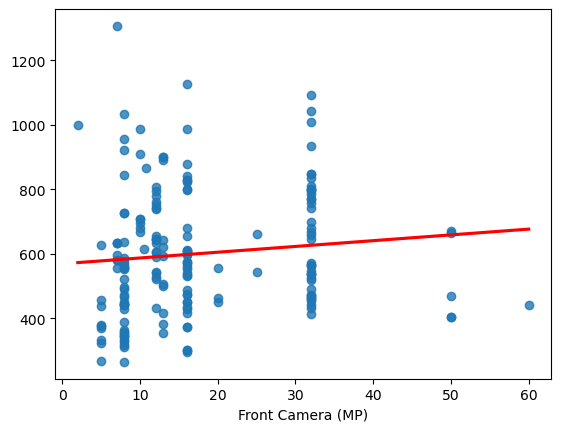

In [118]:
#plot relationship between front camera specs and US pricing

plt6 = sns.regplot(x=X_test['Front Camera (MP)'], y=y_pred, data=df, ci=None, line_kws={"color": "red"})
plt6

<Axes: title={'center': 'Actual vs. Predicted (Linear Regression)'}, xlabel='Actual', ylabel='Predicted'>

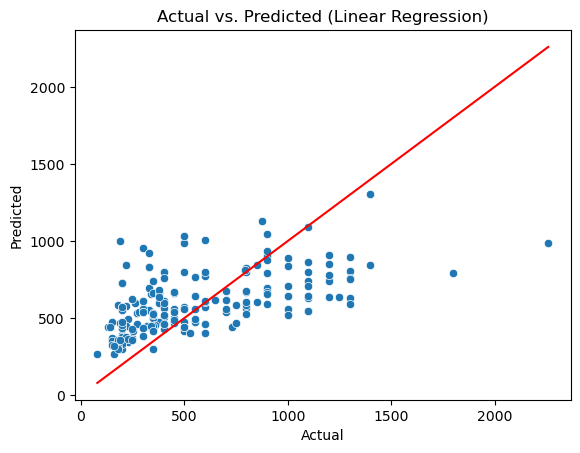

In [120]:
#actual vs predicted pricing plot

plt7 = sns.scatterplot(x=y_test, y=y_pred)
#plots regression line
plt7 = sns.lineplot(x=[min(y_test), max(y_test)],y=[min(y_test), max(y_test)], color='red')
mplt.xlabel('Actual')
mplt.ylabel('Predicted')
mplt.title('Actual vs. Predicted (Linear Regression)')
plt7

<Axes: title={'center': 'Residual Plot (Linear Regression)'}, xlabel='Actual', ylabel='Residuals (Errors)'>

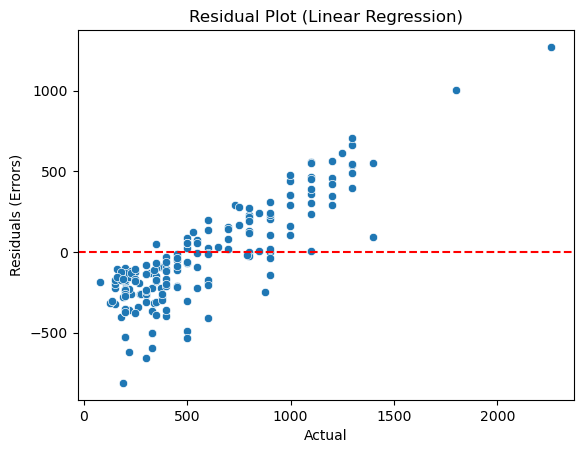

In [122]:
#residual plot

plt8 = sns.scatterplot(x=y_test, y=error)
#adds horizontal line at y = 0 for reference
mplt.axhline(y=0, color='r', linestyle='--') 
mplt.xlabel('Actual')
mplt.ylabel('Residuals (Errors)')
mplt.title('Residual Plot (Linear Regression)')
plt8

In [124]:
#Linear Regression Model 2 Normalized X and log y transformation

X = df.drop(columns=['Price USD', 'Launched Year', 'Back Camera (MP)'])
y = df['Price USD'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1227)

#normalize X values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#log transformation on y
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)  

#fit linear model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_log)

y_pred2 = lr.predict(X_test_scaled)
y_pred = np.expm1(y_pred2)

#calculate mae, mse, and r-squared values
mae = mean_absolute_error(y_test_log, y_pred2)
mse = mean_squared_error(y_test_log, y_pred2)
r2 = r2_score(y_test_log, y_pred2)
error2 = y_test_log - y_pred2

#print results
print(f"Mean Absolute Error: {mae:.2f}", )
print(f"Mean Squared Error: {mse:.2f}", )
print(f"R-squared: {r2:.2f}", )

Mean Absolute Error: 0.40
Mean Squared Error: 0.23
R-squared: 0.49


<Axes: title={'center': 'Residual Plot (Linear Regression)'}, xlabel='Actual', ylabel='Residuals (Errors)'>

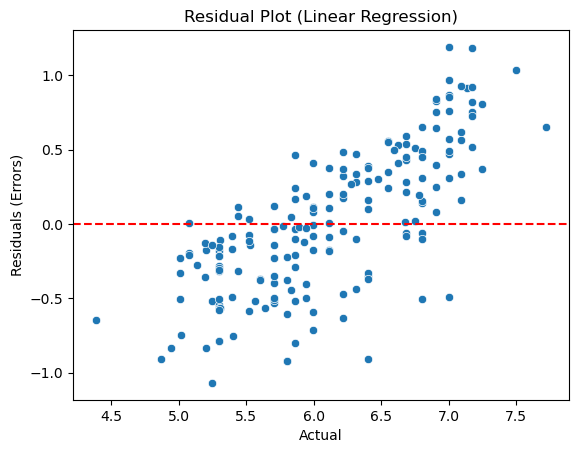

In [126]:
#residual plot for model 2

plt9 = sns.scatterplot(x=y_test_log, y=error2)
#adds horizontal line at y = 0 for reference
mplt.axhline(y=0, color='r', linestyle='--')
mplt.xlabel('Actual')
mplt.ylabel('Residuals (Errors)')
mplt.title('Residual Plot (Linear Regression)')
plt9

<Axes: title={'center': 'Actual vs. Predicted (Linear Regression)'}, xlabel='Actual', ylabel='Predicted'>

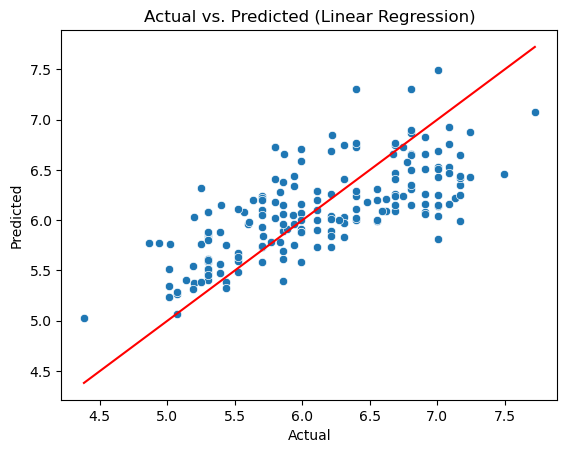

In [128]:
#actual vs predicted prices for model 2

plt10 = sns.scatterplot(x=y_test_log, y=y_pred2)
#plots regression line
plt10 = sns.lineplot(x=[min(y_test_log), max(y_test_log)],y=[min(y_test_log), max(y_test_log)], color='red')
mplt.xlabel('Actual')
mplt.ylabel('Predicted')
mplt.title('Actual vs. Predicted (Linear Regression)')
plt10